### Funciones de distribucion de probabilidad

#### Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a= 1
b = 100
n = 1000000
data = np.random.uniform(a,b,n)

(array([100062., 100563.,  99881.,  99617., 100132., 100049.,  99729.,
         99894.,  99599., 100474.]),
 array([ 1.00000428, 10.89998419, 20.79996411, 30.69994402, 40.59992394,
        50.49990385, 60.39988377, 70.29986368, 80.1998436 , 90.09982352,
        99.99980343]),
 <a list of 10 Patch objects>)

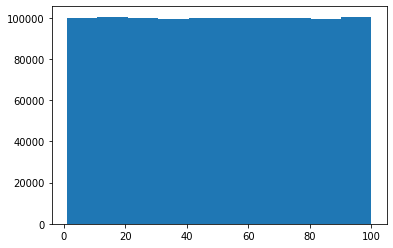

In [3]:
%matplotlib inline
plt.hist(data)

### Distribucion Normal

In [27]:
data = np.random.randn(1000000)

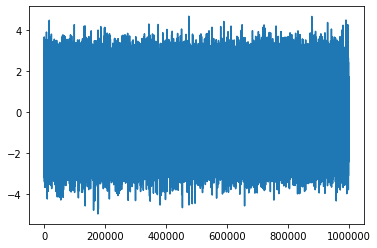

In [28]:
x = range(1,1000001)
plt.plot(x,data)

(array([3.40000e+01, 1.23200e+03, 1.85700e+04, 1.16215e+05, 3.10480e+05,
        3.48903e+05, 1.67422e+05, 3.41980e+04, 2.85000e+03, 9.60000e+01]),
 array([-4.94561414, -3.98368039, -3.02174665, -2.0598129 , -1.09787915,
        -0.13594541,  0.82598834,  1.78792209,  2.74985583,  3.71178958,
         4.67372333]),
 <a list of 10 Patch objects>)

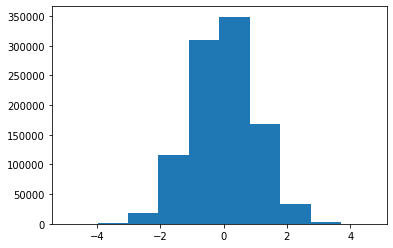

In [29]:
plt.hist(data)

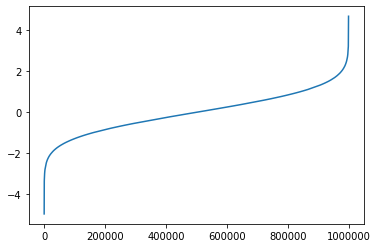

In [30]:
plt.plot(x,sorted(data)) #Funcion de distribución de probabilidad acumulada

(array([  16.,  104.,  544., 1673., 2719., 2684., 1573.,  557.,  114.,
          16.]),
 array([-3.7579126 , -1.90741331, -0.05691403,  1.79358526,  3.64408455,
         5.49458383,  7.34508312,  9.19558241, 11.04608169, 12.89658098,
        14.74708027]),
 <a list of 10 Patch objects>)

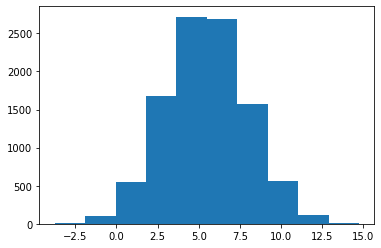

In [8]:
mu = 5.5 #Media que yo quiero
std = 2.5 #Desviacion estandar que yo quiero
data = mu + std*np.random.randn(10000) #Teorema central del limite Z = (x-mu)/std -> N(0,1)
plt.hist(data) #Cambia la desviacion estandar y media de la distribucion normal estandar

In [35]:
data = np.random.randn(2,4)
data

array([[ 1.63296828,  0.79623551, -0.53808255, -0.0189871 ],
       [ 0.0639305 ,  1.55228168, -0.25590931,  0.50929264]])

### La simulación de Monte Carlo

* Generamos dos numeros aleatorios uniformes x e y entre 0 y 1
* Calculamos $x^2$ + $y^2$
    * Si el valor es < 1 estamos dentro del circulo, de lo contrario estamos fuera
* Calculamos el numero total de veces que están dentro del circulo y lo dividimos entre el número total de intentos para obtener una aproximación de caer dentro del circulo.
* Usamos dicha probabilidad para aproximar el valor de $\pi$ 
* Repetimos el procedimiento para obtener diferentes aproximaciones de $\pi$
* Calculamos el promedio de los experimentos anteriores para dar un valor final de $\pi$

3.143088


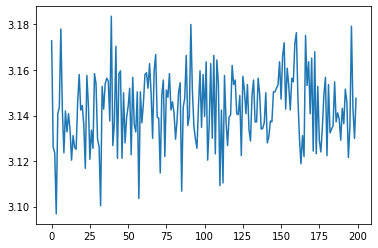

In [11]:
pi_avg = 0
pi_value_list = []
n= 10000 #Número de puntos

for i in range(200): #Repito el experimento 100 veces
    value = 0
    x = np.random.uniform(0,1,n).tolist()
    y = np.random.uniform(0,1,n).tolist()
    for j in range(n):
        z = np.sqrt(x[j]*x[j] + y[j]*y[j])
        if z <=1:
            value+=1
    float_value = float(value)
    pi_value = float_value*4/n
    pi_value_list.append(pi_value)
    pi_avg+=pi_value

pi = pi_avg/200
print(pi)
plt.plot(pi_value_list)

### Dummy Data Sets

In [12]:
n = 1000000
main_dict = {'A': np.random.randn(n),'B':1.5 + 2.5*np.random.randn(n),'C':np.random.uniform(5,32,n)}
data = pd.DataFrame(main_dict)

In [13]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000871,1.498171,18.502230
std,1.000421,2.500391,7.795183
min,-5.487190,-10.225677,5.000035
25%,-0.673831,-0.186410,11.752632
50%,0.001958,1.501787,18.492923
75%,0.676099,3.183782,25.264519
max,4.870537,13.010567,31.999990


(array([ 99876.,  99860., 100117., 100483.,  99929.,  99735.,  99726.,
         99890., 100105., 100279.]),
 array([ 5.00003525,  7.70003072, 10.4000262 , 13.10002167, 15.80001715,
        18.50001262, 21.2000081 , 23.90000357, 26.59999905, 29.29999452,
        31.99999   ]),
 <a list of 10 Patch objects>)

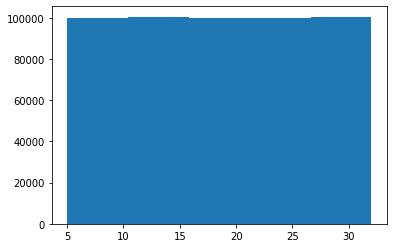

In [14]:
plt.hist(data['C'])

In [15]:
data = pd.read_csv('python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt')

In [16]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [17]:
colum_names = data.columns.values.tolist()

In [19]:
a = len(colum_names)
a

21

In [25]:
new_data = pd.DataFrame({
    'Colum Name': colum_names,
    'A': np.random.randn(a),
    'B': np.random.uniform(0,1,a)
},index = range(42,42+a) #Este index es útil para empalmar estos datos con otros, estos empiezan desde el 42
)

In [26]:
new_data #Dummie Data Frame

,Colum Name,A,B
42,State,-1.327009,0.315626
43,Account Length,1.639384,0.670306
44,Area Code,-2.184751,0.812703
45,Phone,0.687726,0.201761
46,Int'l Plan,-0.298282,0.942617
47,VMail Plan,-0.101366,0.511613
48,VMail Message,-0.478174,0.574233
49,Day Mins,1.462751,0.812626
50,Day Calls,-0.862463,0.078959
51,Day Charge,2.337250,0.780971
